In [67]:
import pandas as pd
def ingest():
    data = pd.read_csv('/content/Twitter_Data.csv')
    data = data[data.category.isnull() == False]
    data['category'] = data['category'].map(int)
    data = data[data['clean_text'].isnull() == False]
    data.reset_index(inplace=True)
    data.drop('index', axis=1, inplace=True)
    print('dataset loaded with shape', data.shape  )  
    return data
data = ingest()
data.head(5)

dataset loaded with shape (162969, 2)


,clean_text,category
0,when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit ps...,-1
1,talk all the nonsense and continue all the drama will vote for modi,0
2,what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax,1
3,asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming...,1
4,answer who among these the most powerful world leader today trump putin modi may,1


In [68]:
data=data.head(1000)
print(data)

                                                                                                                                                                                                  clean_text  category
0    when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit ps...        -1
1                                                                                                                                       talk all the nonsense and continue all the drama will vote for modi          0
2                                                                                      what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax         1
3    asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what

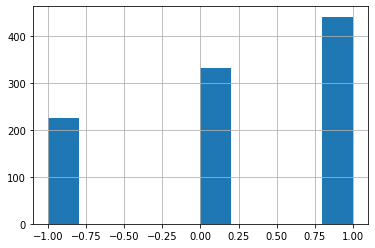

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
data['category'].hist()

In [70]:
data['category'].value_counts()

 1    442
 0    333
-1    225
Name: category, dtype: int64

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['clean_text'],data['category'], test_size=0.2)

In [72]:
print(x_train.shape[0], y_train.shape[0])
print(x_test.shape[0], y_test.shape[0])

800 800
200 200


In [73]:
from gensim.models.phrases import Phrases, Phraser
phrases = Phrases(x_train, min_count=30, progress_per = 10000)
bigram = Phraser(phrases)
tweets = bigram[x_train]

In [74]:
ctweets=pd.DataFrame(tweets)
print(ctweets.sample(5))

                                                                                                                                                                                          0
450                                                                          chokidr kutte moat maro dont need these type chokidar which are products modi sarkrthis also the real face bjp
677                                              planning order one after receiving lakhs that one man called modi now india offered almost years ago but would live have the tag tshirt☺️ 
426  indias elections 2019 not about congress bjp rahul modi but about india sanghistan love hatred secularism communalism pluralism homogenization inclusion exclusion dialogue monologue 
648                                                                       the media are scared nowadays one word against modi they may have shut shop\nthey will lick anyones stay business
462                            with upcoming election india 

In [75]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from tqdm import tqdm
import spacy
from spacy import displacy
from spacy.matcher import Matcher
from spacy.tokens import Span
nlp = spacy.load('en_core_web_sm')
doc = nlp('deeply impressed quick learner modi who has his own way doing things president pranab mukherjee')
for tok in doc:
    print(tok.text, "-", tok.dep_)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
deeply - advmod
impressed - amod
quick - amod
learner - compound
modi - ROOT
who - nsubj
has - relcl
his - poss
own - amod
way - dobj
doing - acl
things - dobj
president - compound
pranab - nsubj
mukherjee - ROOT


In [76]:
def get_entities(sent):
  ent1 = ""
  ent2 = ""
  prv_tok_dep = ""    
  prv_tok_text = ""   
  prefix = ""
  modifier = ""
  for tok in nlp(sent):
    if tok.dep_ != "punct":
      if tok.dep_ == "compound":
        prefix = tok.text
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  return [ent1.strip(), ent2.strip()]

In [77]:
get_entities("manu loves playing cricket")

['manu', 'cricket']

In [78]:
entity_pairs = []
for i in tqdm(ctweets[0]):
  entity_pairs.append(get_entities(i))
print(entity_pairs)

100%|██████████| 800/800 [00:09<00:00, 82.41it/s]

[['that', ''], ['modi', 'corrupt maha thugbandhan modi'], ['modi', 'second smritiji wayanad'], ['', ''], ['years  you', 'smoking weed'], ['life', 'miss marvi'], ['why  you', 'why  this'], ['citizen', 'democratic  spirit'], ['three  codes', 'foreign policy jumpstart'], ['prices', ''], ['aap congress congress', 'much bjp fun'], ['own president pranab', 'own  things'], ['always rahul gandhi', 'just  him'], ['how  government', 'environment'], ['other  prefixes', 'accurately  state'], ['', 'peppermit abvp'], ['job indias', 'too salesman rest'], ['why drag modi', 'street fights'], ['border transcending', ''], ['praise modi', 'new  india'], ['know', 'bjp this'], ['why nirav modi', ''], ['new  jobs', 'pace'], ['too papu raffles raffles', 'abb apne ristdaar mare hai'], ['village electrification', 'biggest  successes'], ['when  she', 'office'], ['away home uprising', 'just  usa'], ['journalists writers', 'cambridge analytica'], ['you', 'conveniently  figures'], ['gold modi', 'land'], ['modi', 'p

In [79]:
entity_pairs[:20]

[['that', ''],
 ['modi', 'corrupt maha thugbandhan modi'],
 ['modi', 'second smritiji wayanad'],
 ['', ''],
 ['years  you', 'smoking weed'],
 ['life', 'miss marvi'],
 ['why  you', 'why  this'],
 ['citizen', 'democratic  spirit'],
 ['three  codes', 'foreign policy jumpstart'],
 ['prices', ''],
 ['aap congress congress', 'much bjp fun'],
 ['own president pranab', 'own  things'],
 ['always rahul gandhi', 'just  him'],
 ['how  government', 'environment'],
 ['other  prefixes', 'accurately  state'],
 ['', 'peppermit abvp'],
 ['job indias', 'too salesman rest'],
 ['why drag modi', 'street fights'],
 ['border transcending', ''],
 ['praise modi', 'new  india']]

In [80]:
def get_relation(sent):
  doc = nlp(sent)
  matcher = Matcher(nlp.vocab)
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 
  matcher.add("matching_1", None, pattern) 
  matches = matcher(doc)
  k = len(matches) - 1
  span = doc[matches[k][1]:matches[k][2]] 
  return(span.text)

In [81]:
a=get_relation("he loves playing cricket")
print(a)

loves


In [82]:
relations = [get_relation(i) for i in tqdm(x_train)]

100%|██████████| 800/800 [00:08<00:00, 92.34it/s]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8294 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2375 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2330 missing from current font.
  font.set_text(s

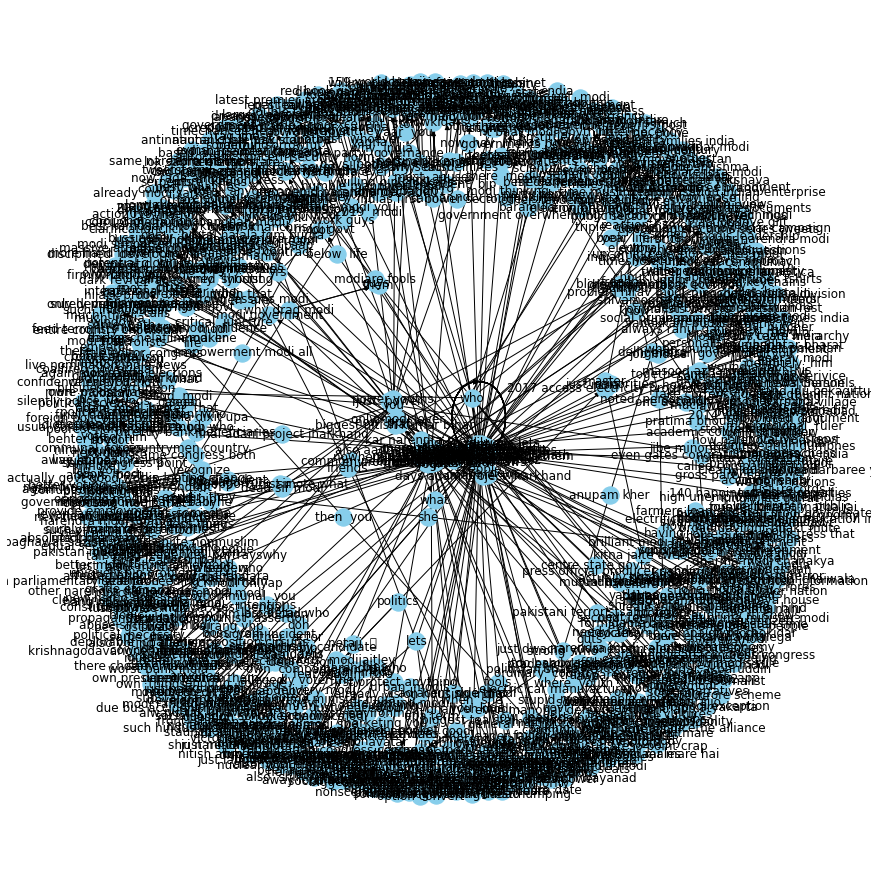

In [83]:
import networkx as nx
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

source = [i[0] for i in entity_pairs]
target = [i[1] for i in entity_pairs]
kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [84]:
from gensim.models.poincare import PoincareRelations
from gensim.models.poincare import PoincareModel
from gensim.models import KeyedVectors
model = PoincareModel(entity_pairs, negative = 10, burn_in=0,workers=1)
model.train(epochs = 50, print_every=400,batch_size=20)

In [85]:
from gensim.models import KeyedVectors
result = model.kv.most_similar("votes")
print(result)

[('economy', 0.01922302577505514), ('just dwacra yuvanestam elections', 0.03726523803896171), ('all auspices ecofindia', 2.7432575160557158), ('topic', 2.7654831123973835), ('2013', 2.7791408957030597), ('free  modi', 2.7849646232510366), ('2019  nation', 2.7850068946230757), ('silently police wounds', 2.7914750762818326), ('someone', 2.7996086237636337), ('ventilator action plan', 2.8093948787002834)]


In [86]:
model.kv.closest_child("modi")

'yogi'

In [88]:
model.kv.similarity('modi','topic')

0.21707694287052925

In [89]:
model.kv.distance('modi','votes')

3.8790249179061487

In [90]:
model.save('pol')

In [91]:
print(model)

In [92]:
words = list(model.kv.vocab)
print(words[0])

that


In [93]:
type(words)

list

In [94]:
arr=model.kv.syn0

In [95]:
print(arr[0])

[-0.11627571 -0.03232181  0.11052687 -0.01583004 -0.10670995 -0.27129011
 -0.02040101  0.01550215  0.03837259  0.02840148 -0.18791324  0.02958984
  0.2902018   0.04192269  0.01350452 -0.02287143 -0.00122118 -0.00991811
  0.09248683 -0.19330419  0.10128143  0.16419797  0.16186943 -0.09381019
  0.14256862 -0.01791056 -0.0045289  -0.17600495  0.07524931 -0.11090584
  0.04840166  0.02095698 -0.22823614 -0.01122941  0.10171026 -0.09290001
  0.08387311 -0.03647337 -0.02392374  0.16381139  0.03120298  0.06844465
 -0.08328898  0.17834236  0.09540749  0.04615301 -0.03521542  0.04748441
  0.26125448  0.02020867]


In [96]:
print(arr[0][1])

-0.032321805747964824


In [97]:
valList=[]
dictFin={}

In [98]:
dictFin=dict(zip(words,arr))

In [104]:
print(type(dictFin['just dwacra yuvanestam elections']))

<class 'numpy.ndarray'>


# **Dict2 with Index**

In [105]:
print(len(words))

1183


In [106]:
print(words[-1])

2019 anusaryr modi hatao


In [107]:
type(words[1])

str

In [108]:
type(words)

list

In [109]:
dictIndex={}
for i in range(len(words)):
  #print(words[i])
  t=i
  dictIndex[words[i]]=t+1

In [110]:
print(dictIndex)

{'that': 1, '': 2, 'modi': 3, 'corrupt maha thugbandhan modi': 4, 'second smritiji wayanad': 5, 'years  you': 6, 'smoking weed': 7, 'life': 8, 'miss marvi': 9, 'why  you': 10, 'why  this': 11, 'citizen': 12, 'democratic  spirit': 13, 'three  codes': 14, 'foreign policy jumpstart': 15, 'prices': 16, 'aap congress congress': 17, 'much bjp fun': 18, 'own president pranab': 19, 'own  things': 20, 'always rahul gandhi': 21, 'just  him': 22, 'how  government': 23, 'environment': 24, 'other  prefixes': 25, 'accurately  state': 26, 'peppermit abvp': 27, 'job indias': 28, 'too salesman rest': 29, 'why drag modi': 30, 'street fights': 31, 'border transcending': 32, 'praise modi': 33, 'new  india': 34, 'know': 35, 'bjp this': 36, 'why nirav modi': 37, 'new  jobs': 38, 'pace': 39, 'too papu raffles raffles': 40, 'abb apne ristdaar mare hai': 41, 'village electrification': 42, 'biggest  successes': 43, 'when  she': 44, 'office': 45, 'away home uprising': 46, 'just  usa': 47, 'journalists writers': 

In [111]:
print(dictIndex['banaoge toh hindus'])

614


In [112]:
model.kv.save_word2vec_format('mod.txt')

In [113]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
tsne_mode = TSNE(n_components = 3, verbose = 1, random_state = 0, angle = .99, init = 'pca', perplexity = 40)
tsne_poincare = tsne_mode.fit_transform(model.kv[model.kv.vocab])


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1183 samples in 0.001s...
[t-SNE] Computed neighbors for 1183 samples in 0.061s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1183
[t-SNE] Computed conditional probabilities for sample 1183 / 1183
[t-SNE] Mean sigma: 0.068510
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.483147
[t-SNE] KL divergence after 750 iterations: 1.214661


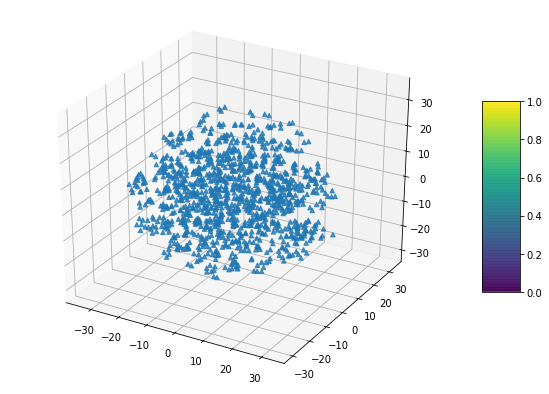

In [114]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection="3d")
sctt = ax.scatter3D(tsne_poincare[:, 0], tsne_poincare[:, 1],tsne_poincare[:, 2],alpha = 0.8,cmap = plt.get_cmap('hsv'),marker = '^')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.show()
plt.show()

In [115]:
embedding_matrix = np.zeros((len(dictIndex) + 1, 1000))
print(embedding_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


LSTM

In [116]:
from keras.layers import Dense, Embedding, LSTM, Bidirectional
embedding_layer = Embedding(len(dictIndex) + 1,1000,weights=[embedding_matrix],input_length=1000,trainable=False)

In [117]:
from keras.models import Sequential
embedding_dim = 16
input_length = 100
model1 = Sequential([embedding_layer,Bidirectional(LSTM(embedding_dim, return_sequences=True)),Bidirectional(LSTM(embedding_dim,)),Dense(6, activation='relu'),Dense(1, activation='sigmoid')])
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [118]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 1000)        1184000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 1000, 32)         130176    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dense_14 (Dense)            (None, 6)                 198       
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 1,320,653
Trainable params: 136,653
Non-

In [119]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
X_train_indices = tokenizer.texts_to_sequences(x_train)
X_train_indices = pad_sequences(X_train_indices, maxlen=1000, padding='post')
X_test_indices = tokenizer.texts_to_sequences(x_test)
X_test_indices = pad_sequences(X_test_indices, maxlen=1000, padding='post')

In [120]:
history = model1.fit(X_train_indices, y_train, epochs=5, validation_data=(X_test_indices, y_test))

Epoch 1/5
25/25 [==============================] - 19s 538ms/step - loss: 0.6898 - accuracy: 0.3237 - val_loss: 0.6864 - val_accuracy: 0.3700
Epoch 2/5
25/25 [==============================] - 11s 443ms/step - loss: 0.6839 - accuracy: 0.3237 - val_loss: 0.6802 - val_accuracy: 0.3700
Epoch 3/5
25/25 [==============================] - 11s 444ms/step - loss: 0.6778 - accuracy: 0.3237 - val_loss: 0.6745 - val_accuracy: 0.3700
Epoch 4/5
25/25 [==============================] - 11s 443ms/step - loss: 0.6721 - accuracy: 0.3237 - val_loss: 0.6688 - val_accuracy: 0.3700
Epoch 5/5
25/25 [==============================] - 11s 444ms/step - loss: 0.6667 - accuracy: 0.3237 - val_loss: 0.6631 - val_accuracy: 0.3700


CNN

In [121]:
from keras import models,layers
cnn=models.Sequential([
                      layers.Dense(150, activation='relu'),
                      layers.Dense(100, activation='relu'),
                      layers.Dense(10, activation='softmax')
])
cnn.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
cnn.fit(X_train_indices, y_train,epochs=3)

Epoch 1/3
25/25 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.3237
Epoch 2/3
25/25 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.3237
Epoch 3/3
25/25 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.3237


GRU

In [130]:
from keras.layers import LSTM,Dense,Embedding,Dropout,CuDNNGRU
model1=Sequential()
model1.add(Embedding(len(dictIndex) + 1,1000,weights = [embedding_matrix],input_length =1000,trainable = False))

model1.add(CuDNNGRU(64))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])
history = model1.fit(X_train_indices, y_train,epochs = 5,batch_size=32,validation_split=0.2)

Epoch 1/5
20/20 [==============================] - 4s 158ms/step - loss: 0.6458 - accuracy: 0.3125 - val_loss: 0.6278 - val_accuracy: 0.3688
Epoch 2/5
20/20 [==============================] - 3s 146ms/step - loss: 0.5092 - accuracy: 0.3125 - val_loss: 0.6370 - val_accuracy: 0.3688
Epoch 3/5
20/20 [==============================] - 3s 140ms/step - loss: 0.5023 - accuracy: 0.3125 - val_loss: 0.6410 - val_accuracy: 0.3688
Epoch 4/5
20/20 [==============================] - 3s 145ms/step - loss: 0.4951 - accuracy: 0.3125 - val_loss: 0.6881 - val_accuracy: 0.3688
Epoch 5/5
20/20 [==============================] - 3s 145ms/step - loss: 0.4945 - accuracy: 0.3125 - val_loss: 0.6734 - val_accuracy: 0.3688
